
Versiones:
- Python 3.9.23 | packaged by conda-forge | (main, Jun  4 2025, 17:57:12) 
[GCC 13.3.0]
- TensorFlow 2.18.0
- tf.Keras 3.10.0

Dataset check:
- tran_images shape:  (60000, 28, 28)
- train_labels len:  60000
- test_images shape:  (10000, 28, 28)
- test_labels len:  10000
- class_names len:  10
- train_labels:  [9 0 0 ... 3 0 5]


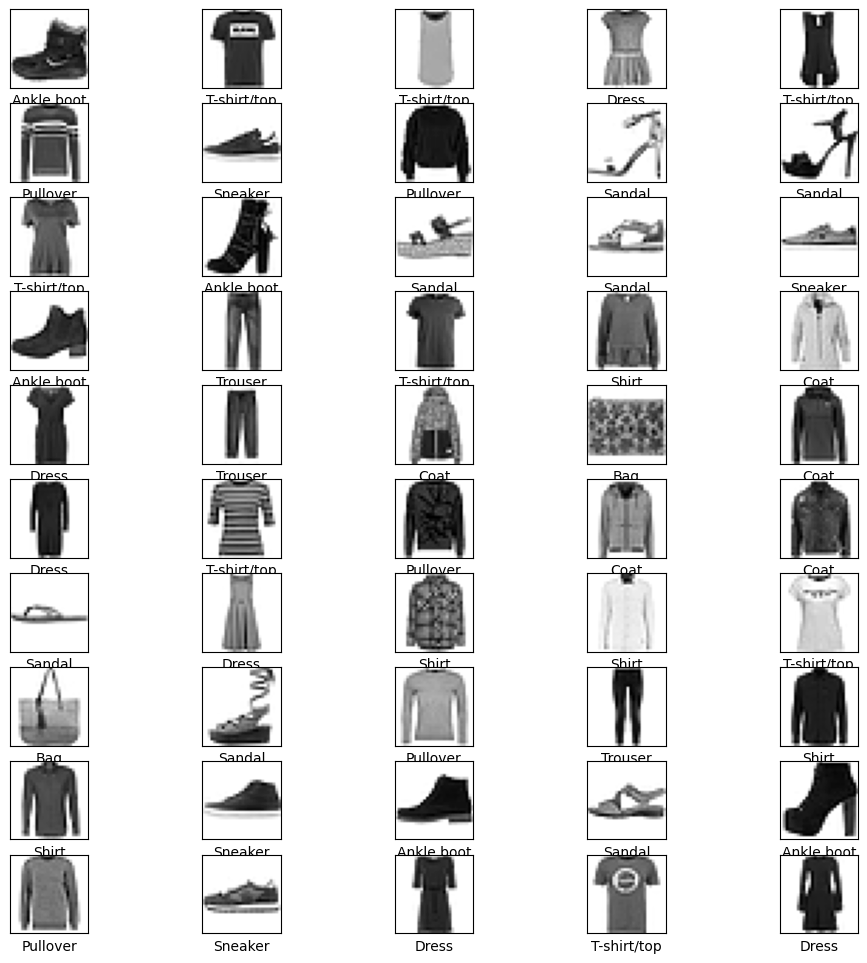

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3267 - loss: 2.0350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6488 - loss: 1.3530
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7068 - loss: 1.0628
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7259 - loss: 0.9189
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7407 - loss: 0.8296
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7489 - loss: 0.7868
Test accuracy:  0.7450000047683716


In [9]:
# Librerías Deep Learning
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#007700")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label]. set_color('black')

print("\nVersiones:")
print("- Python", sys.version)
print("- TensorFlow", tf.__version__)
print("- tf.Keras", tf.keras.__version__)

# Dataset Fashion-MNIST, que está en storage.googleapis.com en TensorFlow/Keras
# Tenemos 4 matrices (tensores) organizados en dos tuplas (listas solo lectura)
# train_images: Matriz con imágenes de entrenamiento
# train_labels: Matriz con las etiquetas de las imágenes de entrenamiento
# test_images: Matriz con imágenes de prueba
# test_labels: Matriz con las etiquetas de las imágenes de prueba
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Lista con los nombres de las clases de ropa
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocesado del dataset -> adaptar los datos para usarlos en la red neuronal
# Normalización: de uint8 [0 - 255] a float32 [0 - 1]
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

# Best practice - comprobar la forma de los datos
print("\nDataset check:")
print("- tran_images shape: ", train_images.shape)
print("- train_labels len: ", len(train_labels))
print("- test_images shape: ", test_images.shape)
print("- test_labels len: ", len(test_labels))
print("- class_names len: ", len(class_names))
print("- train_labels: ", train_labels)

plt.figure(figsize=(12,12))
for i in range (50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Definición del modelo
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
print("\n")
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Entrenamiento del modelo
print("\n")
model.fit(train_images, train_labels, epochs=5)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)




313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
[2.7511818e-02 8.4672451e-01 3.9525502e-03 9.2655398e-02 1.0430425e-02
 3.1812787e-03 8.7751346e-03 3.6833913e-03 3.0758619e-04 2.7779420e-03]
El modelo reconoce:  1
Etiqueta correcta:  1


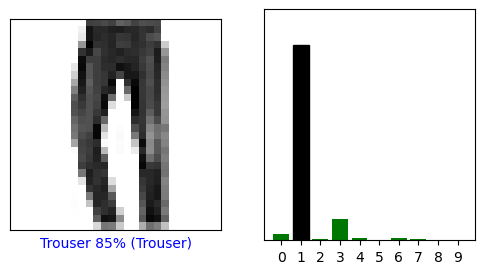

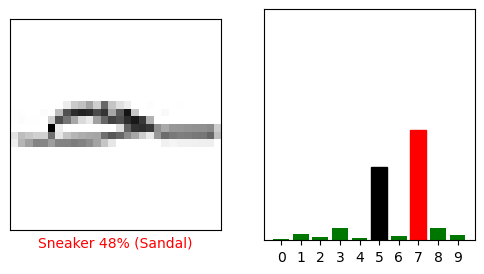

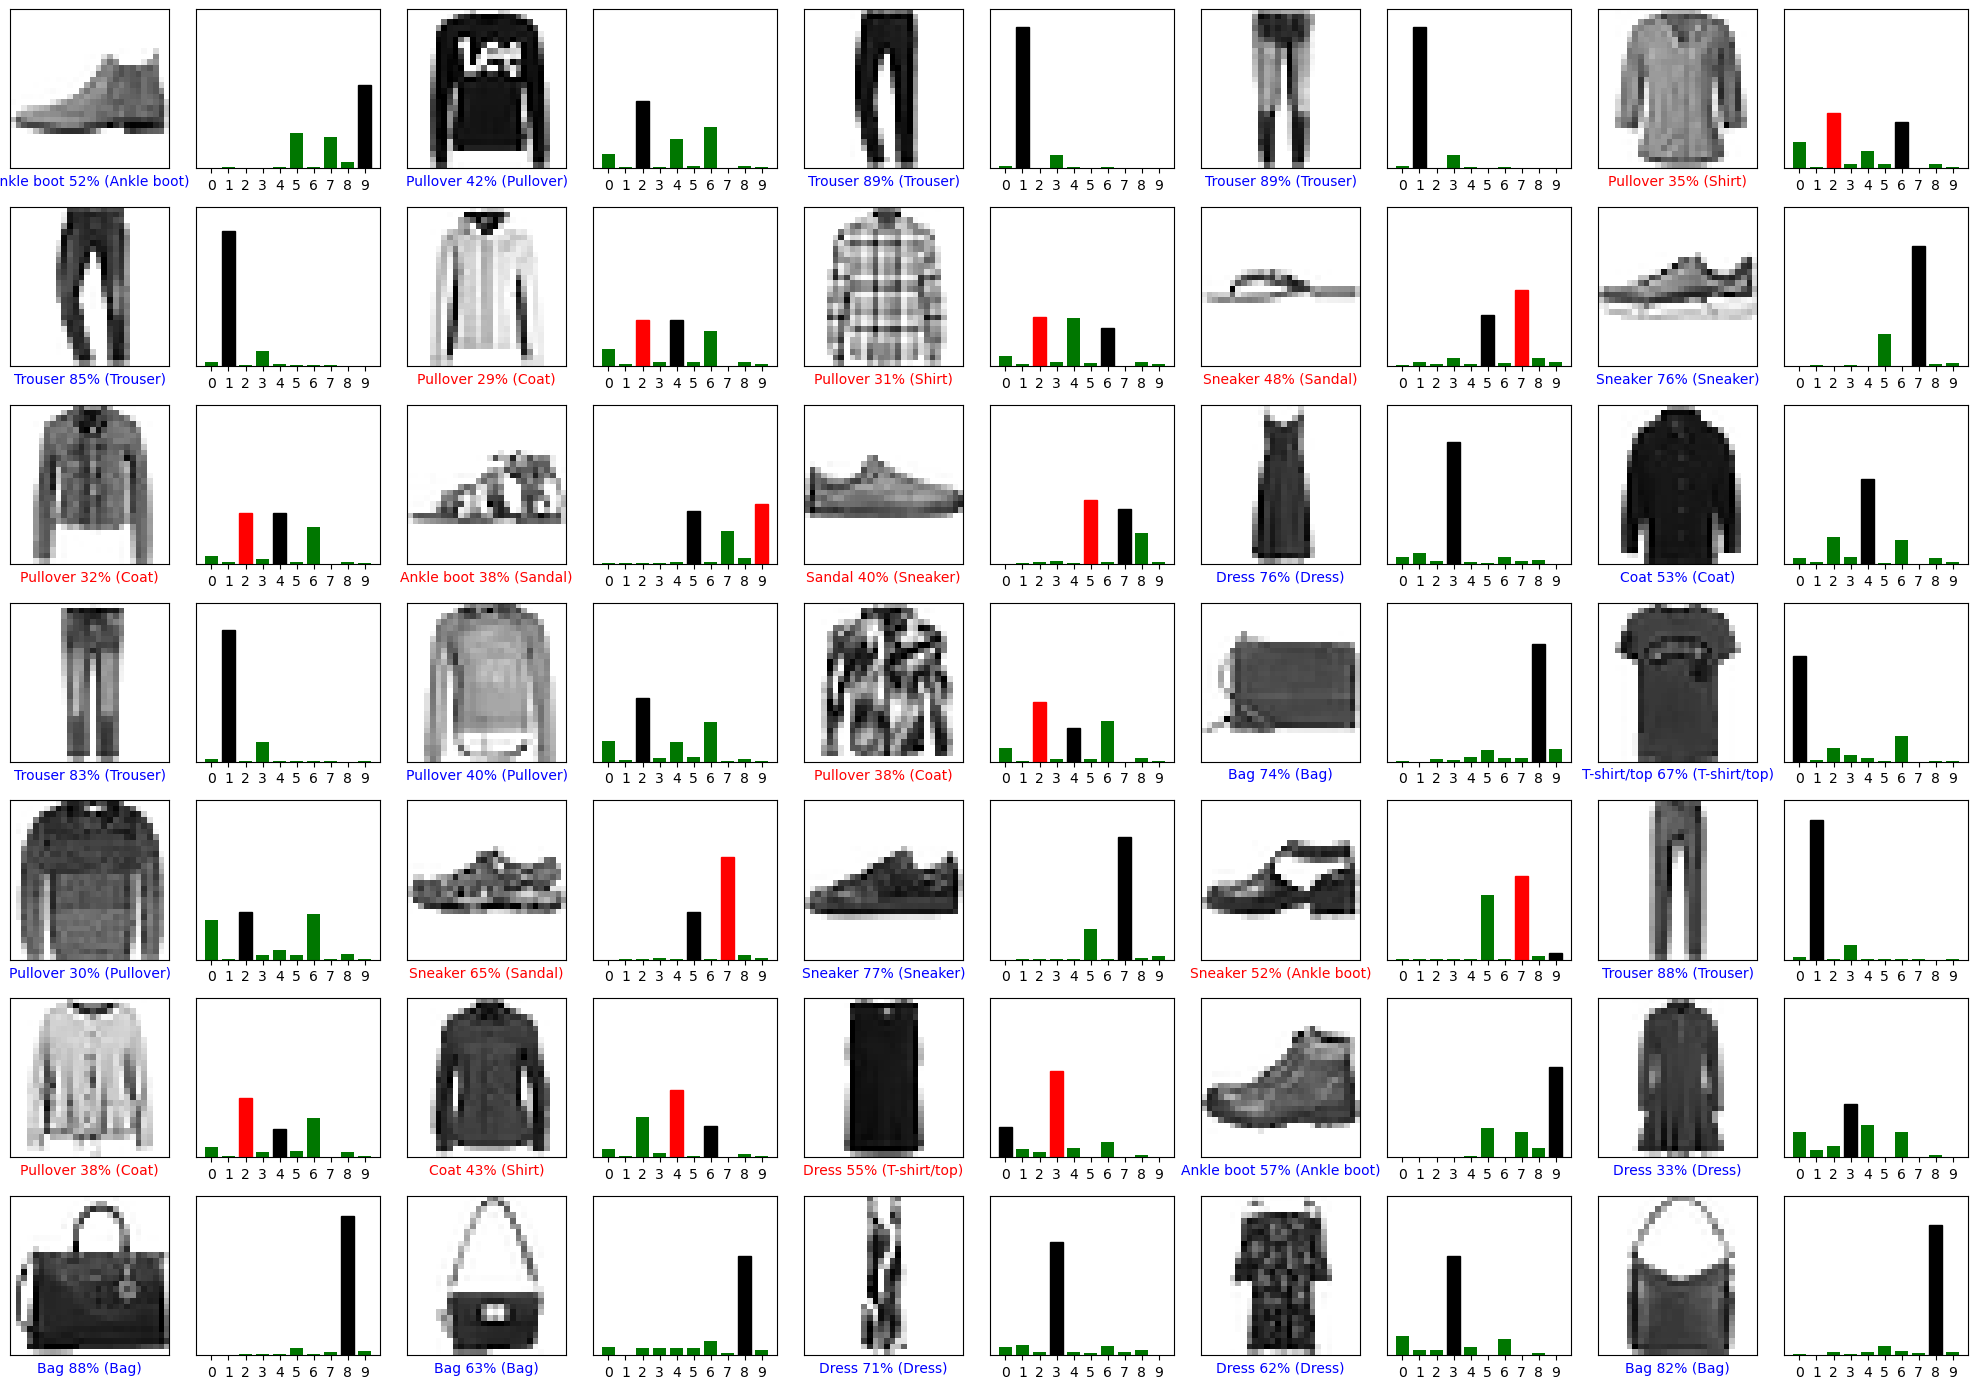


Fin del programa.


In [10]:
# Uso del modelo
predictions = model.predict(test_images)
print(predictions[5])
print("El modelo reconoce: ", np.argmax(predictions[5]))
print("Etiqueta correcta: ", test_labels[5])      

i = 5
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

i = 8
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

num_rows = 7
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

print("\nFin del programa.")